In [ ]:
#---Author: Thomas Donovan with code support by Edward Oughton
#---Code Purpose: Create Histograms and Water Indexes of captured images
#---What to add: Once I figure out how to fix my ability to make shapes, I will include shape aspects i think.

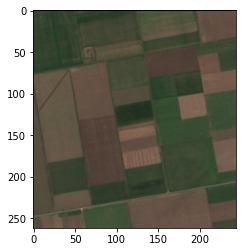

<AxesSubplot:>

In [1]:
import os
import rasterio
from rasterio.plot import show
from rasterio.features import shapes
import numpy as np
import matplotlib.pyplot as plt
#Reminder for name system
# x_bridge ; x_rail ; x_road


In [1]:
#-------IMAGE CLIPPING---------#

image_file = "T36TXS_20220426T083559_TCI_10m.jp2"

my_image = rasterio.open(image_file)
my_image

from rasterio.plot import show
show(my_image)

NameError: name 'rasterio' is not defined

In [ ]:
xmin, ymin, xmax, ymax = my_image.bounds


x_range = xmax - xmin
y_range = ymax - ymin
print(x_range, y_range)


xmin = xmin + (x_range / 30)
ymin = ymax - (y_range / 6)
xmax = xmin + (x_range / 45)
ymax = ymax - (y_range / 7)


xmin, ymin, xmax, ymax

In [ ]:
my_geojson = [
    {
        "type": "Polygon", 
        "coordinates": [
          [
            [
              xmin,
              ymin
            ],
            [
              xmax,
              ymin
            ],
            [
              xmax,
              ymax
            ],
            [
              xmin,
              ymax
            ],
            [
              xmin,
              ymin
            ]
          ],
        ]
      }
    ]
my_geojson

In [ ]:
from rasterio.mask import mask

with rasterio.open(image_file) as img:
    clipped, transform = mask(img, my_geojson, crop=True)

show(clipped)

In [ ]:
meta = my_image.meta.copy()

meta.update(
    {
    
        "transform": transform,
        "height":clipped.shape[1],
        "width":clipped.shape[2]
    }
)

#Rename your .tif file here!!
# x_bridge ; x_rail ; x_road

with rasterio.open('irpin_bridge.tif', 'w', **meta) as dst:
    dst.write(clipped)
    
print('Writing complete')
#######################################

In [ ]:
##-----RGB BAND PROCESSING IF NEEDED-----#

In [ ]:
my_image = rasterio.open('irpin_bridge.tif')

show(my_image.read())

In [ ]:
#----RGB Band processesing
red = my_image.read(1)
green = my_image.read(2)
blue = my_image.read(3)
nir = my_image.read(4)
blue, green, red, nir

In [ ]:
show(blue, cmap='Blues')

In [ ]:
show(green, cmap='Greens')

In [ ]:
show(red, cmap='Reds')

In [ ]:
#Float Conversion
red = np.float32(red)
green = np.float32(green)
blue = np.float32(blue)

In [1]:
#Water indexing
water_index = np.zeros(blue.shape)
water_index[(red > green)] = 1

plt.imshow(water_index)
plt.colorbar(shrink=0.7)

NameError: name 'np' is not defined